Referência: https://github.com/fchollet/deep-learning-with-python-notebooks

In [ ]:
import keras

# **Classificando resenhas de filmes:** um exemplo de classificação binária

Observação: Este bloco de notas contém os exemplos de código encontrados no Capítulo 3, Seção 5 do Deep Learning with Python. Observe que o texto original apresenta muito mais conteúdo, em particular mais explicações e figuras: neste bloco de notas, você encontrará apenas o código-fonte e comentários relacionados.

Nesse exemplos aplicaremos a classificação do tipo binária, ou seja, a saída terá apenas duas possibilidade de classificação. Esse é um tipo muito comum de aplicação e utilização de modelos de Deep learning. 

O exemplo proposto avalia resenhas de filmes do IMDB como positivo e negativo, se baseando na palavras contidas nos textos. 

**O conjunto de dados IMDB **

Resumidamente o conjunto de dados contém 50000 resenhas de filmes. Divididos em 25000 para treino e 25000 para teste. Sendo que teste e treino são divididos em 50% de resenhas positivas e 50% de resenhas negativas. 
Para mais informações sobre o conjunto de dados acessar: 

O conjunto de dados IMDB vem no pacote do Keras. 
Já foi pré-processado: as resenhas (sequências de palavras) foram transformadas em sequências de inteiros, onde cada inteiro representa uma palavra específica em um dicionário.

O código a seguir carregará o conjunto de dados (quando você executá-lo pela primeira vez, cerca de 80 MB de dados serão baixados para sua máquina):

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#num_words é a quantidade de palavras mais frequentes que vamos manter. 
#As palavras raras serão descartas. 
#train_data e test_data são os dados das avaliações, enquanto que train_label e test_label são as etiquetas de 0 ou 1 associada a cada
#avaliação. Sendo 0 para negativo e 1 para positivo. 

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# word_index é um dicionario que mapeia as palavras para um índice inteiro
word_index = imdb.get_word_index()
# Nós o invertemos, mapeando índices inteiros para palavras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Nós decodificamos a revisão; observe que nossos índices foram compensados ​​por 3
# porque 0, 1 e 2 são índices reservados para "preenchimento", "início da sequência" e "desconhecido".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Pré-processamento

Não podemos alimentar a rede neural com listas de inteiros. Então vamos transformar essas listas em tensores. 

Para isso vamos transformá-las em vetores variando de 0 e 1. 

Concretamente, isso significaria, por exemplo, transformar a sequência [3, 5] em um vetor de 10.000 dimensões que seriam todos zeros exceto para os índices 3 e 5, que seriam uns. Então poderíamos usar como primeira camada em nossa rede uma camada Densa, capaz de lidar com dados vetoriais de ponto flutuante.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Crie uma matriz totalmente zero de forma (len (sequências), dimensão)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # definir índices específicos de resultados [i] para 1s
    return results

# Nossos dados de treinamento vetorizados
x_train = vectorize_sequences(train_data)
# Nossos dados de teste vetorizados
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Nossos rótulos vetorizados
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Construindo a Rede
Nossos dados de entrada são simplesmente vetores, e nossos rótulos são escalares (1s e 0s): esta é a configuração mais fácil que você encontrará. Um tipo de rede com bom desempenho em tal problema seria uma pilha simples de camadas totalmente conectadas (Densa) com ativações relu: Densa (16,ativação = 'relu')


O argumento que está sendo passado para cada camada Densa (16) é o número de "unidades ocultas" da camada. O que é uma unidade oculta? É uma dimensão no espaço de representação da camada. Você deve se lembrar do capítulo anterior que cada camada Densa com uma ativação relu implementa a seguinte cadeia de operações de tensor:


output = relu(dot(W, input) + b)

Ter 16 unidades ocultas significa que a matriz de peso W terá forma (dimensão_entrada, 16), ou seja, o produto escalar com W projetará os dados de entrada em um espaço de representação de 16 dimensões (e então adicionaríamos o vetor de polarização b e aplicaríamos o operação relu). Você pode compreender intuitivamente a dimensionalidade do seu espaço de representação como "quanta liberdade você está permitindo que a rede tenha ao aprender representações internas". Ter mais unidades ocultas (um espaço de representação de dimensão superior) permite que sua rede aprenda representações mais complexas, mas torna sua rede mais cara computacionalmente e pode levar ao aprendizado de padrões indesejados (padrões que irão melhorar o desempenho nos dados de treinamento, mas não no dados de teste).

Existem duas principais decisões de arquitetura a serem feitas sobre essa pilha de camadas densas:

 **Quantas camadas usar.**
Quantas "unidades ocultas" escolher para cada camada.
No próximo capítulo, você aprenderá os princípios formais para guiá-lo ao fazer essas escolhas. Por enquanto, você terá que confiar em nós a seguinte escolha de arquitetura: duas camadas intermediárias com 16 unidades ocultas cada, e uma terceira camada que produzirá a previsão escalar em relação ao sentimento da revisão atual. As camadas intermediárias usarão relu como sua "função de ativação", e a camada final usará uma ativação sigmóide para gerar uma probabilidade (uma pontuação entre 0 e 1, indicando a probabilidade de a amostra ter o alvo "1", ou seja, a probabilidade de a avaliação ser positiva). Um relu (unidade linear retificada) é uma função destinada a zerar valores negativos, enquanto um sigmóide "esmaga" valores arbitrários no intervalo [0, 1], gerando assim algo que pode ser interpretado como uma probabilidade.

E aqui está a implementação do Keras, muito semelhante ao exemplo MNIST que você viu anteriormente:



In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Por último, precisamos escolher uma função de perda e um otimizador. Visto que estamos enfrentando um problema de classificação binária e a saída de nossa rede é uma probabilidade (terminamos nossa rede com uma camada de unidade única com uma ativação sigmóide), é melhor usar a perda binária_crossentropia. Não é a única escolha viável: você pode usar, por exemplo, mean_squared_error. Mas crossentropy é geralmente a melhor escolha quando você está lidando com modelos que geram probabilidades. Crossentropy é uma grandeza do campo da Teoria da Informação, que mede a "distância" entre as distribuições de probabilidade, ou no nosso caso, entre a distribuição da verdade fundamental e nossas previsões.

Aqui está a etapa em que configuramos nosso modelo com o otimizador rmsprop e a função de perda binary_crossentropy. Observe que também monitoraremos a precisão durante o treinamento.


In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Estamos passando nosso otimizador, função de perda e métricas como strings, o que é possível porque rmsprop, binary_crossentropy e precisão são empacotados como parte do Keras. Às vezes, você pode querer configurar os parâmetros de seu otimizador ou passar uma função de perda personalizada ou função métrica. Isso pode ser feito passando uma instância de classe do otimizador como o argumento do otimizador:


In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

O último pode ser feito passando objetos de função como os argumentos de perda ou métrica:



In [13]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Validando a abordagem
Para monitorar durante o treinamento a precisão do modelo nos dados que ele nunca viu antes, criaremos um "conjunto de validação" separando 10.000 amostras dos dados de treinamento originais:

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Agora treinaremos nosso modelo por 20 épocas (20 iterações em todas as amostras nos tensores x_train e y_train), em minilotes de 512 amostras. Ao mesmo tempo, monitoraremos a perda e a precisão nas 10.000 amostras que separamos. Isso é feito passando os dados de validação como o argumento validation_data:



In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5346 - binary_accuracy: 0.7661 - val_loss: 0.4164 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3345 - binary_accuracy: 0.8985 - val_loss: 0.3312 - val_binary_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2433 - binary_accuracy: 0.9263 - val_loss: 0.3281 - val_binary_accuracy: 0.8669
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1895 - binary_accuracy: 0.9427 - val_loss: 0.2765 - val_binary_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1524 - binary_accuracy: 0.9547 - val_loss: 0.2801 - val_binary_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1229 - binary_accuracy: 0.9656 - val_loss: 0.3133 - val_binary_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los


Na CPU, isso levará menos de dois segundos por época - o treinamento termina em 20 segundos. No final de cada época, há uma pequena pausa enquanto o modelo calcula sua perda e precisão nas 10.000 amostras dos dados de validação.

Observe que a chamada para model.fit () retorna um objeto History. Este objeto possui um histórico de membros, que é um dicionário contendo dados sobre tudo o que aconteceu durante o treinamento. Vamos dar uma olhada nisso:


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


Ele contém 4 entradas: uma por métrica que estava sendo monitorada, durante o treinamento e durante a validação. Vamos usar Matplotlib para traçar a perda de treinamento e validação lado a lado, bem como a precisão de treinamento e validação:


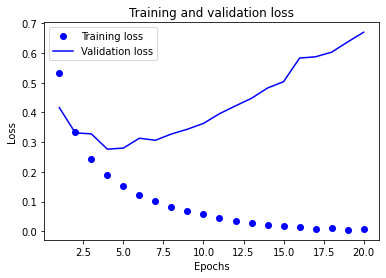

In [18]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

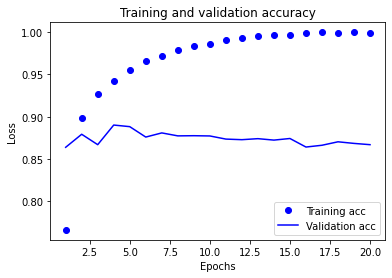

In [20]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Os pontos são a perda e a precisão do treinamento, enquanto as linhas sólidas são a perda e a precisão da validação. Observe que seus próprios resultados podem variar ligeiramente devido a uma inicialização aleatória diferente de sua rede.

Como você pode ver, a perda de treinamento diminui a cada época e a precisão do treinamento aumenta a cada época. Isso é o que você esperaria ao executar a otimização de gradiente descendente - a quantidade que você está tentando minimizar deve diminuir a cada iteração. Mas esse não é o caso da perda de validação e precisão: eles parecem atingir o pico na quarta época. Este é um exemplo do que alertamos anteriormente: um modelo com melhor desempenho nos dados de treinamento não é necessariamente um modelo que terá um desempenho melhor nos dados que nunca viu antes. Em termos precisos, o que você está vendo é "overfitting": após a segunda época, estamos superotimizando os dados de treinamento e acabamos aprendendo representações que são específicas para os dados de treinamento e não generalizam para dados fora do conjunto de treinamento.

Nesse caso, para evitar overfitting, poderíamos simplesmente interromper o treinamento após três épocas. Em geral, há uma variedade de técnicas que você pode utilizar para mitigar o sobreajuste, que abordaremos no próximo capítulo.

Vamos treinar uma nova rede do zero por quatro épocas e, em seguida, avaliá-la em nossos dados de teste:

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4854 - accuracy: 0.8013
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2760 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2062 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.8839


In [22]:
results

[0.29304638504981995, 0.8839200139045715]

In [23]:
model.predict(x_test)

array([[0.22039926],
       [0.99998194],
       [0.92617404],
       ...,
       [0.12413818],
       [0.0925833 ],
       [0.6918749 ]], dtype=float32)

# Outras experiências
Estávamos usando 2 camadas ocultas. Tente usar 1 ou 3 camadas ocultas e veja como isso afeta a validação e a precisão do teste.
Tente usar camadas com mais unidades ocultas ou menos unidades ocultas: 32 unidades, 64 unidades ...
Tente usar a função de perda mse em vez de binary_crossentropy.
Tente usar a ativação tanh (uma ativação que era popular nos primeiros dias das redes neurais) em vez de relu.
Esses experimentos ajudarão a convencê-lo de que as escolhas de arquitetura que fizemos são bastante razoáveis, embora ainda possam ser melhoradas!

Conclusões
Aqui está o que você deve aprender com este exemplo:

Geralmente, há um pouco de pré-processamento que você precisa fazer em seus dados brutos para poder alimentá-los - como tensores - em uma rede neural. No caso de sequências de palavras, elas podem ser codificadas como vetores binários - mas também existem outras opções de codificação.
Pilhas de camadas densas com ativações relu podem resolver uma ampla gama de problemas (incluindo classificação de sentimento) e provavelmente você as usará com frequência.
Em um problema de classificação binária (duas classes de saída), sua rede deve terminar com uma camada Densa com 1 unidade e uma ativação sigmóide, ou seja, a saída de sua rede deve ser um escalar entre 0 e 1, codificando uma probabilidade.
Com essa saída sigmóide escalar, em um problema de classificação binária, a função de perda que você deve usar é binary_crossentropy.
O otimizador rmsprop é geralmente uma boa escolha de otimizador, seja qual for o seu problema. Isso é uma coisa a menos para você se preocupar.
À medida que melhoram seus dados de treinamento, as redes neurais eventualmente começam a se ajustar excessivamente e acabam obtendo resultados cada vez piores em dados nunca vistos antes. Certifique-se de sempre monitorar o desempenho nos dados que estão fora do conjunto de treinamento.